In [1]:
import pandas as pd
import seaborn as sns
def anti_trafo(x, adult_age=20):
    y = np.where(
        x < 0, (1 + adult_age) * np.exp(x) - 1, (1 + adult_age) * x + adult_age
    )
    return y

In [23]:
%%time
bio=pd.read_table('data/bio/tsv/69-001-7012.genome.GRCh38Decoy.dedup.ssCG_quant.combined.tsv',skiprows=1,header=None)#,nrows=1000000)
bio.columns=['Chromosome','pos','methylated','unmethylated','total']
bio=bio[bio['Chromosome']!='chrM'].copy()
bio['beta']=bio['methylated']/bio['total']
#bio=pd.read_table('data/bio/meth/7012.m',header=None,sep=' ',nrows=10**8)

CPU times: user 9.77 s, sys: 907 ms, total: 10.7 s
Wall time: 10.4 s


In [45]:
ds=bio[['Chromosome','methylated','unmethylated','total']].sample(10**6)
ds=ds[ds['Chromosome'].str.len()<6].sort_values('Chromosome'). reset_index(drop=True).copy()
pl=ds.melt('Chromosome',var_name='Methylatoin',value_name='Average coverage').copy()

CPU times: user 23.6 s, sys: 47.7 ms, total: 23.7 s
Wall time: 23.7 s


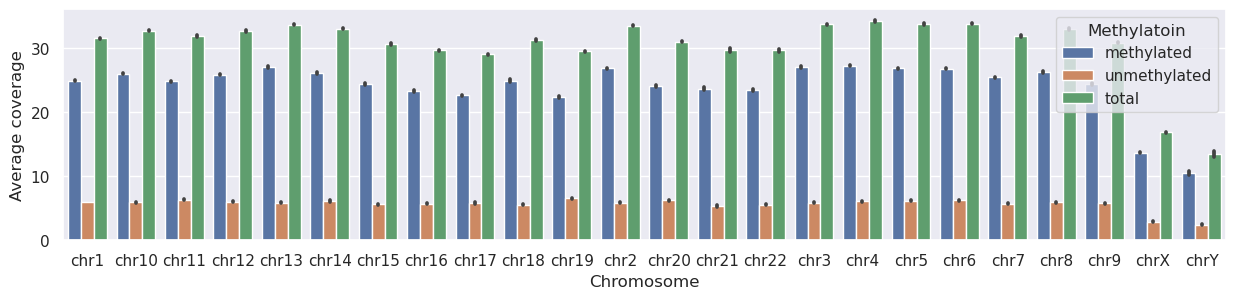

In [79]:
%%time 
sns.set(rc={'figure.figsize':(15,3)})
ax=sns.barplot(data=pl, x='Chromosome',y='Average coverage',hue='Methylatoin')

In [95]:
chr1=bio[bio['Chromosome']=='chr1'].copy()

In [110]:
chr1['Chromosome 1']=chr1['pos']/1000000

/tmp/ipykernel_62857/212815418.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  g=chr1.groupby(chr1['Chromosome 1'].round())['methylated','unmethylated','total'].mean().plot(kind='line')


[(0.0, 50.0), Text(0, 0.5, 'Average coverage')]

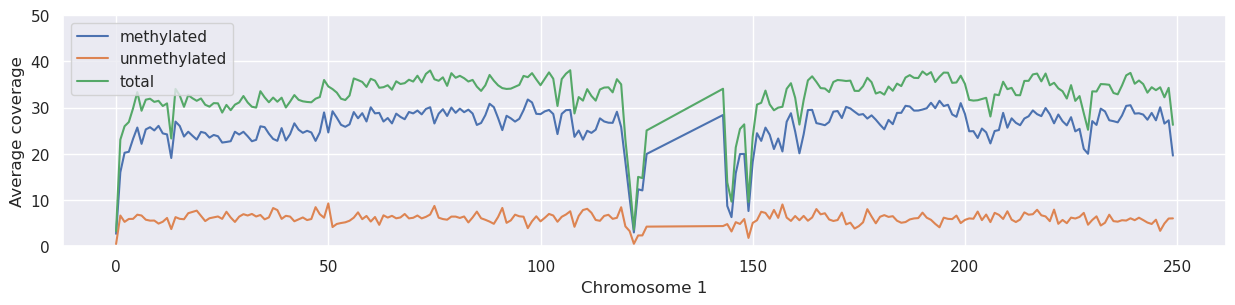

In [115]:
g=chr1.groupby(chr1['Chromosome 1'].round())['methylated','unmethylated','total'].mean().plot(kind='line')
g.set(ylim=[0,50],ylabel='Average coverage')

In [116]:
bio['beta'].mean()

0.7775332422463193

In [40]:
bio=bio[bio['total']>0].copy()

<Axes: xlabel='beta', ylabel='Count'>

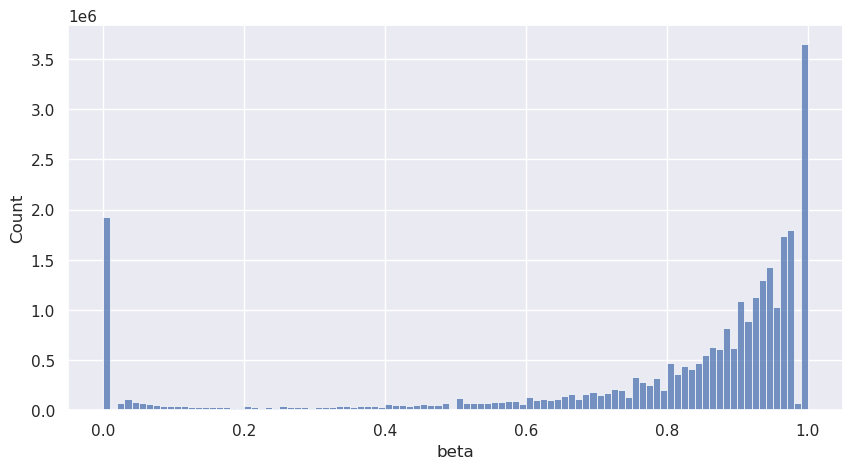

In [41]:
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(bio['beta'],bins=100)

In [117]:
%%time
df=pd.read_table('data/bio/merge.table',nrows=10**8)
df.index=df['7012']
df.index=df.index.rename('cpg')
df.index=df.index.str[:-6]
df=df.drop('7012',axis=1)
df.columns=['7012']+list(df.columns)[:-1]
df.shape

CPU times: user 36.4 s, sys: 4.97 s, total: 41.4 s
Wall time: 41.9 s


(29372136, 8)

In [141]:
%%time
h=df[['7012','7046']].sample(10**5).copy()
h['m']=h.mean(1).round(1)
h['s']=h[['7012','7046']].std(1)

CPU times: user 2.12 s, sys: 125 ms, total: 2.24 s
Wall time: 2.23 s


In [142]:
pl=h[['m','s']].dropna()

[(0.0, 0.11),
 Text(0.5, 0, 'Methylation level'),
 Text(0, 0.5, 'Standard deviation')]

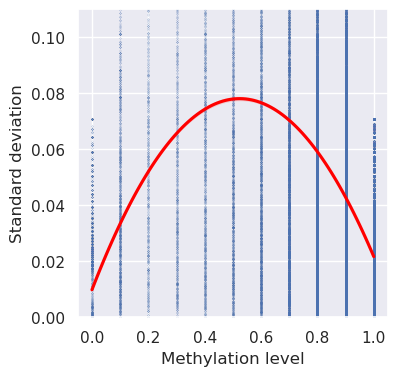

In [155]:
sns.set(rc={'figure.figsize':(4,4)})
g=sns.regplot(data=pl,x='m',y='s',order=2, marker='o', color='red', scatter_kws={'s':.01,'color':'b'})
g.set(ylim=[0,.11],xlabel='Methylation level',ylabel='Standard deviation')

In [156]:
cor=df.corr()

In [162]:
cor.index=range(16,24)
cor.columns=cor.index

[Text(0.5, 1.0, 'Pairwise correlations')]

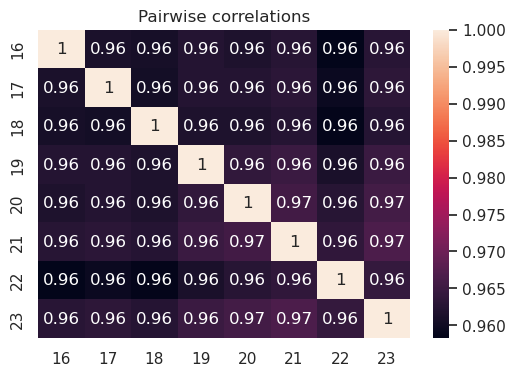

In [169]:
sns.set(rc={'figure.figsize':(6,4)})
g=sns.heatmap(cor,annot=cor)
g.set(title='Pairwise correlations')

<Axes: xlabel='7012', ylabel='7046'>

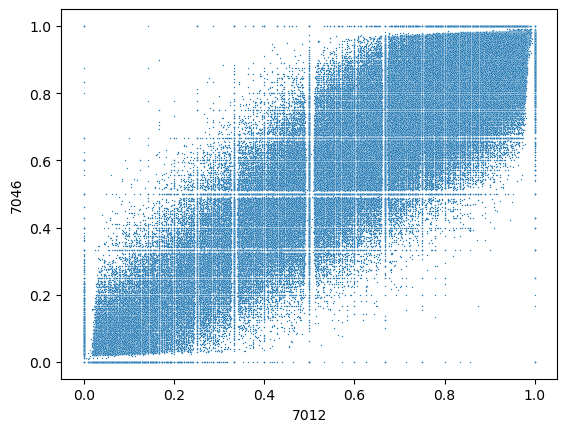

In [21]:
sns.scatterplot(data=df.head(1000000),s=1,x='7012',y='7046')

In [58]:
df['chr']=df.index.str.split(':').str[0]

In [69]:
c6=df[df['chr']=='chr6']

In [70]:
c6['pos']=c6.index.str.split(':').str[1].astype(int)

/local/scratch/moqri/slrmtmp.42038346/ipykernel_42173/2424191476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c6['pos']=c6.index.str.split(':').str[1].astype(int)


In [23]:
han=pd.read_csv('https://raw.githubusercontent.com/bio-learn/biolearn/master/biolearn/data/Horvath1.csv',index_col=0)
han=han.join(man,how='inner')
han['beg']=han['beg'].astype(int)
han.index=han['chr']+':'+(han['beg']+1).astype(str)

In [31]:
%%time
han=han.join(df,how='inner')

CPU times: user 26.6 s, sys: 1.66 s, total: 28.3 s
Wall time: 27.9 s


In [32]:
han=han.drop(['chr','beg'],axis=1)

In [33]:
for i in han.columns[1:]:
    han[i]=han[i]*han['CoefficientTraining']

In [34]:
import numpy as np

In [47]:
pl=han.sum().apply(lambda x: anti_trafo(x + 0.696)).drop('CoefficientTraining')

[Text(0, 0.5, 'Biological age'), Text(0.5, 0, 'Sample collection year')]

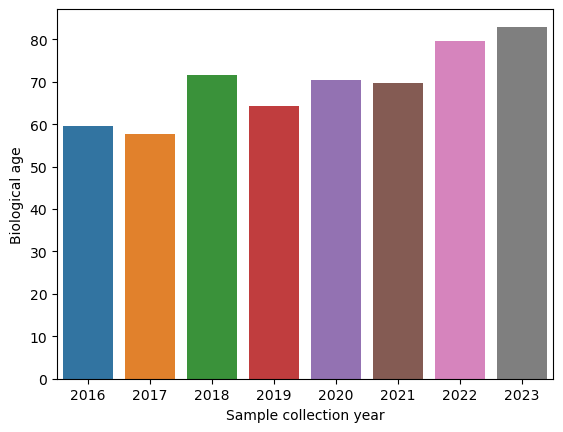

In [57]:
g=sns.barplot(x=list(range(2016,2024)),y=pl)
g.set(ylabel='Biological age',xlabel='Sample collection year')

CPU times: user 13.6 s, sys: 1.05 s, total: 14.7 s
Wall time: 14.9 s


In [61]:
m=m.mean(1).rename(450)

In [62]:
m=man.join(m,how='inner')

In [63]:
m.index=m['chr']+':'+(m['beg']+1).astype(str)

In [66]:
#h.index=h.index.str[:-6]

In [ ]:
%%time 
dg=m[['array']].join(h[['mm']].head(10**8),how='inner')

In [58]:
%%time
sns.regplot(data=dg.head(10**6),x='array',y='mm',scatter_kws={'s':.05})

NameError: name 'dg' is not defined

In [195]:
dg['wg-array']=dg['mm']-dg['array']
dg['average betas']=dg['array'].round(1)

In [197]:
pl=dg.groupby('average betas').mean()

[(-0.22, 0.22)]

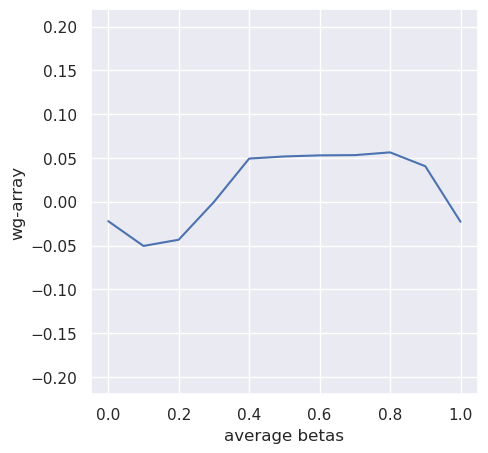

In [199]:
g=sns.lineplot(pl['wg-array'])
g.set(ylim=[-.22,.22])

<Axes: ylabel='Count'>

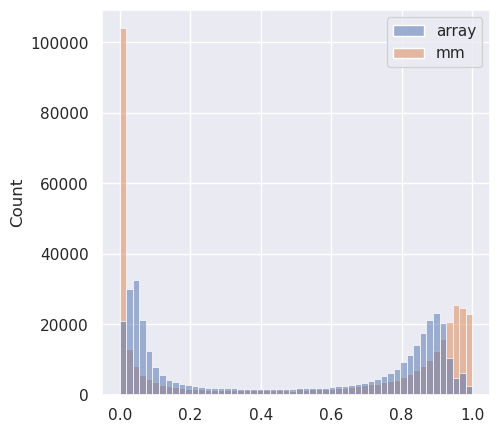

In [204]:
sns.histplot(dg[['array','mm']])